# Predicting NASDAQ Stock Index Price
The objective of the project is for exploration and testing of different methods of machine learning, more specifically, methods learned in class and various other methods practiced throughout the market. There are many implications that you can acquire from the robust data available to investors we wanted to determine if we could exploit some of these ideas so that we might have a better understanding of how the market performs and if it was possible to predict prices. It is well known that it is challenging to predict stock market prices due to the presence of volatility, nevertheless, we wanted to encounter and explore this challenge for ourselves. We used multiple different methods to determine the best features to use for the model then we deployed some models using neural networks to help us understand the behaviors of the ever changing market place.

Accurate prediction of the stock market would be tremendous for the financial industry, or anybody for that matter. In reality, we know that this is a very difficult task and no one has quite been able to perfect the algorithm, that being said, we only hope to be inspired by the project to develop a better model in the future based on the same ideas that we deployed for this project. The number one rule when talking about the market is 'never lose money'. Risk comes from those that are not prepared or those that don't understand the data. Technology is far from being able to predict the future, but if we can understand the data and determine a way to leverage its insights we can make better investments with higher returns.

“Forecasts may tell you a great deal about the forecaster; they tell you nothing about the future.” -Warren Buffet


# Data
NASDAQ index data is available online through various financial data aggregators, 
we used Alpha Vantage API to procure our data. We collected the obvious ones: 'Open', 'Close' etc. but we also 
wanted to see if factors like method of moments or weighted moving average would help us in better predicting the 'close' price. 
The time-series dataset contains 2518 instances (days),approximately 10 years worth of data. Each instance in the
data set contains 24 features for which we will leverage in making predictions.


## Import Statements and Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from pandas import Series
import time
import csv 
import json
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from ta import *
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from IPython.display import display
import io
plt.rcParams['figure.figsize'] = (18, 12)
# file='NASDAQ_FEATURES.csv'

data=pd.DataFrame()
data=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data=data.reset_index(drop=True)
data = data.dropna()

print('Number of observations:' ,len(data))
# getting the data to where we can work with it
opening_price=data["open"]
daily_high=data['high']
daily_low=data['low']
closing_price=data['close']
daily_volume=data['volume']
ema=data['EMA']
rsi=data['RSI']
sma=data['SMA']
mac_d=data['MACD']
macd_hist=data['MACD_Hist']
macd_signal=data['MACD_Signal']
slow_D=data['SlowD']
slow_K=data['SlowK']
wma=data['WMA']
real_upper_band=data['Real Upper Band']
real_lower_band=data['Real Lower Band']
real_middle_band=data['Real Middle Band']
adx=data['ADX']
# cci=data['CCI']
aroon_up=data['Aroon Up']
aroon_down=data['Aroon Down']
dema= data['DEMA']
kama=data["KAMA"]
roc=data['ROC']
sar=data['SAR']
 #I made this list just case we need to use it later to build model   &&   #  maybe take out daily change percentage
feature_list = ['open','high','low', 'close', 'volume','RSI','SMA','EMA',\
    'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
        'Real Middle Band','KAMA','DEMA','ADX','Aroon Up','Aroon Down']
# np.isnan(data.values.any())

Using TensorFlow backend.


Number of observations: 2518


## Reason why we are using Lasso Regression

## LASSO REGRESSION
# Need to take out the open, high and low so that we can possible accomplish a more desirable result from the lasso regressor

In [2]:
Xs = data.drop(['close'], axis=1)
y = data['close'].values.reshape(-1,1)

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5, refit = True)

#lasso_regressor.fit(Xs, y)

print("The best parameter is:", lasso_regressor.best_params_)
print("The best score is:", lasso_regressor.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## PRE-PROCESSING For Lasso Regressor

In [3]:
# Separate the train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.2, random_state=10)
#Implement LASSO REGRESSION
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)
pred_cv = lassoReg.predict(X_test)
# RETRIEVE MSE
mse = np.mean((pred_cv - y_test)**2)
print("MSE for lasso Regression:",mse)
print("Score for Lasso Regression:",lassoReg.score(X_test,y_test))
coeffs = lassoReg.coef_       
print("Lasso Coefficients:",coeffs)
coeffs = lassoReg.sparse_coef_  
print("Lasso Sparse coefficients:",coeffs)
coeffs = lassoReg.intercept_    
print("Lasso Intercept:",coeffs)
# print(Xs)

MSE for lasso Regression: 824.1278106389648
Score for Lasso Regression: 0.7280698656920368
Lasso Coefficients: [ 0.2621432   0.19250873  0.02238465 -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.          0.          0.          0.          0.        ]
Lasso Sparse coefficients:   (0, 0)	0.26214319652780455
  (0, 1)	0.19250873306014069
  (0, 2)	0.022384647562044682
Lasso Intercept: [26.29488289]


Looking @ the result above we notice that the results give us sparse coefficients for 'Open','Close' & 'Volume'. 
We are going to come back and build a model with just those features in the near future but for now, we just want to see 
how the model performs if we use all the features of the data (28 total). 

$$•OpenCoef_=0.96322411$$
$$•CloseCoef_=0.00533752$$
$$•VolumeCoeff_=0.00120249$$
$$•LassoIntercept=69.49548245 $$
$$The best parameter is: {'alpha': 10}$$
$$The best score is: 0.999082309448763$$
BUT...The MSE is high so we do not want to rely on this model.


# The score of this  LASSO Regressor model is bad.




In [4]:

## PCA
#First need to normalize the stocks

def get_normalized_data(data,feature_list,scaler=None):
    
    # Initialize a scaler, then apply it to the features
    if scaler=='MinMaxScaler()':
        scaler = MinMaxScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])
    if scaler=='StandardScaler()':
        scaler=StandardScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])

    return data
normalized_stocks=get_normalized_data(data,feature_list,scaler='MinMaxScaler()')
print(normalized_stocks.head(2))

       open      high       low     close    volume       SMA       EMA  \
0  1.000000  1.000000  0.996305  0.990498  0.000000  0.998967  1.000000   
1  0.988815  0.995253  1.000000  1.000000  0.024599  0.992031  0.996788   

        WMA      DEMA      KAMA  ...     SlowK       RSI       ADX     ROC  \
0  1.000000  1.000000  1.000000  ...  0.844724  0.650198  0.078561  6.2094   
1  0.993465  0.995953  0.995932  ...  0.987331  0.748185  0.065777  8.5996   

   Aroon Down  Aroon Up  Real Lower Band  Real Middle Band  Real Upper Band  \
0    0.133333       1.0         1.000000          1.000000         0.980225   
1    0.166667       1.0         0.989392          0.996958         0.984487   

        SAR  
0  103.4491  
1  102.6621  

[2 rows x 24 columns]


## Principal Component Analysis

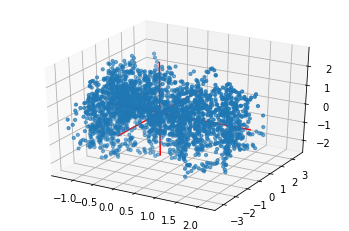

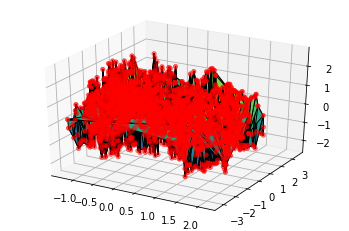

array([9.30323857e-01, 6.92479040e-02, 1.74347473e-04])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [5]:
import seaborn as sns
from mpl_toolkits import mplot3d
def plotPCA(normalized_stocks):
    pca = PCA(n_components=3,whiten=True)
    principalComponents = pca.fit_transform(normalized_stocks)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    finalDf = pd.concat([principalDf, data[['close']]], axis = 1)
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], cmap="Set2_r", s=10)


    # make simple, bare axis lines through space:
    xAxisLine = ((min(principalDf['Principal Component 1']), max(principalDf['Principal Component 1'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(principalDf['Principal Component 2']), max(principalDf['Principal Component 2'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(principalDf['Principal Component 3']), max(principalDf['Principal Component 3'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
    plt.show()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'],cmap='viridis', edgecolor='black')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], c='r', cmap='viridis', linewidth=0.5)
#     targets = data['adjusted_close']
#     colors = ['r', 'g', 'b']
#     for target in targets:
#         indicesToKeep = finalDf['adjusted_close'] == target
#         ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
#                    , finalDf.loc[indicesToKeep, 'Principal Component 2']
#                    , s = 40)
    
#     ax.grid()
    plt.show()
    display(pca.explained_variance_ratio_)
    display(pca)
plotPCA(normalized_stocks)


## Explanation of the PCA results...

## Correlation matrix and cluster heat map of the Features & breakdown

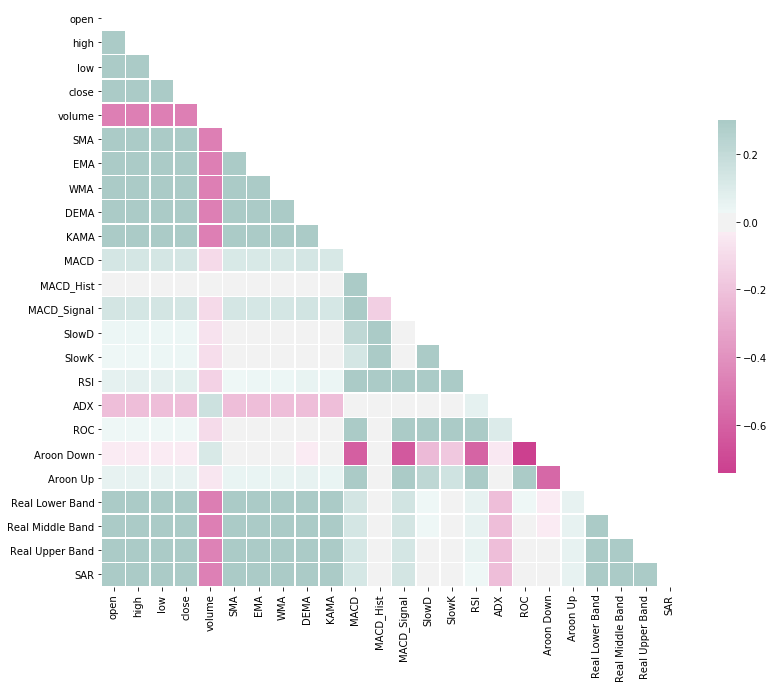

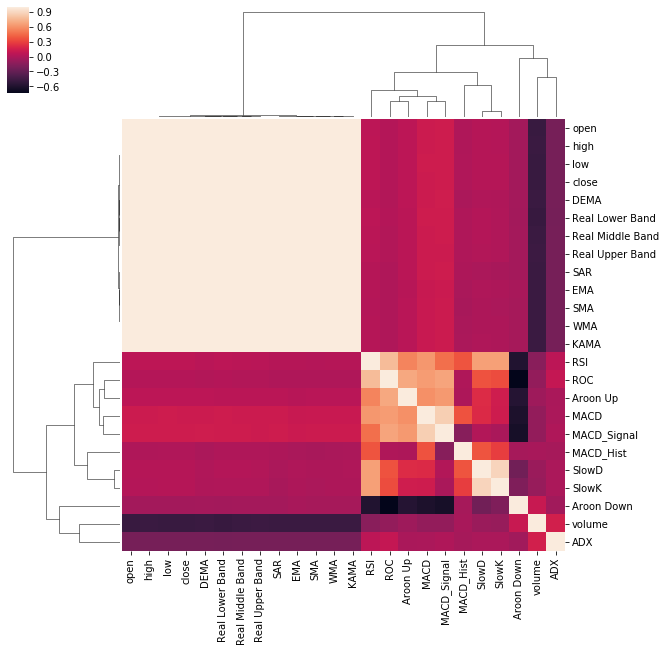

In [6]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,13))
cmap = sns.diverging_palette(700, 900, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)

## Linear Regression

In [7]:
data_2=pd.DataFrame()
index=0
data_2=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col=index)
data_2 = data_2.dropna()
print(data_2)

def scale_range(x, input_range, target_range):
    
    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range
def train_test_split_linear_regression(data_2):
    
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    # fix this later
    for index, row in data_2.iterrows():
        # print([np.array(row['close'])])
        feature.append([row['Day']])
        label.append([(row['close'])])
        

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .2
    split = int(math.floor(len(data_2['Day']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(data)


                open      high       low   close     volume       SMA  \
timestamp                                                               
11/21/2019  105.9700  106.2300  104.4700  104.86   190426.0  102.4892   
11/20/2019  104.9800  105.8100  104.7937  105.70   635005.0  101.9017   
11/19/2019  104.8000  105.2400  103.7800  105.07   888200.0  101.4642   
11/18/2019  103.7800  104.6800  103.5200  104.60   972200.0  101.1025   
11/15/2019  103.1100  104.1500  102.8300  103.59  2597200.0  100.7658   
11/14/2019  103.2700  103.3100  102.3900  103.26   804600.0  100.3975   
11/13/2019  102.0500  103.7500  101.2400  103.27   805700.0   99.9925   
11/12/2019  102.6300  102.6300  101.3000  102.45   809400.0   99.7108   
11/11/2019  100.3700  102.5800  100.2200  102.53   825300.0   99.4842   
11/8/2019   100.3100  101.2600  100.1600  100.66   919700.0   99.6200   
11/7/2019   100.4400  100.6700   99.1600  100.53   959300.0   99.5717   
11/6/2019    98.1600  100.0800   97.9800   99.92   

KeyError: 'Day'

## Build LinReg Model

In [8]:
def build_model(X, y):
    
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod
def predict_prices(model, x, label_range):
    
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()
print("Open   --- mean :", np.mean(data_2['open']),  "  \t Std: ", np.std(data_2['open']),  "  \t Max: ", np.max(normalized_stocks['open']),  "  \t Min: ", np.min(normalized_stocks['open']))
print("Close  --- mean :", np.mean(data_2['close']), "  \t Std: ", np.std(data_2['close']), "  \t Max: ", np.max(normalized_stocks['close']), "  \t Min: ", np.min(normalized_stocks['close']))
print("Volume --- mean :", np.mean(data_2['volume']),"  \t Std: ", np.std(data_2['volume']),"  \t Max: ", np.max(normalized_stocks['volume']),"  \t Min: ", np.min(normalized_stocks['volume']))

Open   --- mean : 50.45033689436056   	 Std:  25.814553149557003   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 50.47590190627474   	 Std:  25.81253216366166   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 1443372.0138999205   	 Std:  1157631.119200242   	 Max:  1.0   	 Min:  0.0


In [9]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
def plot_prediction(actual, prediction, title='Actual NASDAQ vs Prediction', y_label='Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()
# Building the model for simple linear regression
model=build_model(X_train,y_train)
simple_predictions=predict_prices(model,X_test, label_range)
plot_prediction(y_test,simple_predictions)
print('Model Coefficient:',model.coef_)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Mean squared error: %.2f"
      % mean_squared_error(X_train, y_train))
print('R2= %.2f' % r2_score(X_train, y_train))



ValueError: cannot reshape array of size 46322 into shape (2014,1)

## Preprocessing for LSTM model

In [10]:
import os
normalized_stocks=data_2
# normalized_stocks=normalized_stocks.drop('Day',1)
normalized_stocks=get_normalized_data(normalized_stocks,feature_list,scaler='MinMaxScaler()')
display(normalized_stocks.shape)
display(normalized_stocks.head())

(2518, 24)

,open,high,low,close,volume,SMA,EMA,WMA,DEMA,KAMA,...,SlowK,RSI,ADX,ROC,Aroon Down,Aroon Up,Real Lower Band,Real Middle Band,Real Upper Band,SAR
timestamp,,,,,,,,,,,,,,,,,,,,,
11/21/2019,1.000000,1.000000,0.996305,0.990498,0.000000,0.998967,1.000000,1.000000,1.000000,1.000000,...,0.844724,0.650198,0.078561,6.2094,0.133333,1.0,1.000000,1.000000,0.980225,103.4491
11/20/2019,0.988815,0.995253,1.000000,1.000000,0.024599,0.992031,0.996788,0.993465,0.995953,0.995932,...,0.987331,0.748185,0.065777,8.5996,0.166667,1.0,0.989392,0.996958,0.984487,102.6621
11/19/2019,0.986781,0.988812,0.988430,0.992873,0.038609,0.986865,0.991457,0.987767,0.989072,0.984261,...,0.949145,0.723087,0.053701,8.2303,0.200000,1.0,0.989580,0.991380,0.973549,101.8029
11/18/2019,0.975257,0.982483,0.985462,0.987557,0.043257,0.982595,0.986426,0.981709,0.982522,0.972786,...,0.916615,0.703701,0.042776,5.6459,0.233333,1.0,0.985130,0.985366,0.966197,100.8438
11/15/2019,0.967687,0.976493,0.977587,0.976131,0.133171,0.978620,0.981468,0.976646,0.975978,0.963202,...,0.888470,0.658996,0.033044,4.3938,0.266667,1.0,0.988842,0.980614,0.953489,100.0173


In [11]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=300, unroll_length=50):
    
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
    y_train = stocks[prediction_time:-test_data_cut]['close'].as_matrix()

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
    y_test = stocks[prediction_time - test_data_cut:]['close'].as_matrix()

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

xTrain, xTest,yTrain, yTest = train_test_split_lstm(normalized_stocks, 5)

unroll_length = 50

xTrain = unroll(xTrain, unroll_length)
xTest = unroll(xTest, unroll_length)
yTrain = yTrain[-xTrain.shape[0]:]
yTest = yTest[-xTest.shape[0]:]


## Get the shapes of the data
print("x_train", xTrain.shape)
print("y_train", yTrain.shape)
print("x_test", xTest.shape)
print("y_test", yTest.shape)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

x_train (2112, 50, 24)
y_train (2112,)
x_test (296, 50, 24)
y_test (296,)


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## Basic LSTM ->Build the model 
## Note: Need to investigate the appropriate parameters of this model e.g. number of layers and neurons, try out SGD ir sigmoid activation function and determine which optimizer best suits our situation.

In [12]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        500,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.05)

predictions = model.predict(xTest)





compilation time :  0.030007123947143555
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2006 samples, validate on 106 samples
Epoch 1/5
2006/2006 [==============================] - 23s 11ms/step - loss: 0.0322 - val_loss: 0.0032
Epoch 2/5
2006/2006 [==============================] - 20s 10ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 3/5
2006/2006 [==============================] - 20s 10ms/step - loss: 6.7043e-04 - val_loss: 8.2503e-04
Epoch 4/5
2006/2006 [==============================] - 21s 11ms/step - loss: 4.1566e-04 - val_loss: 7.8128e-04
Epoch 5/5
2006/2006 [==============================] - 20s 10ms/step - loss: 2.9814e-04 - val_loss: 0.0011


## Plot the Basics LSTM model before improvement 

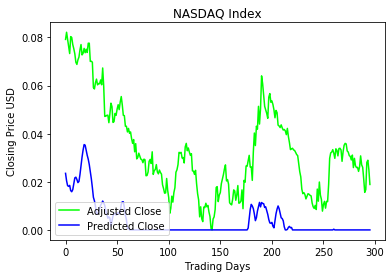

Train Score: 0.00146431 MSE (0.03826630 RMSE)
Test Score: 0.00106948 MSE (0.03270297 RMSE)


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [15]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
new_model=train_test_split_lstm(normalized_stocks, prediction_time=5, test_data_size=200, unroll_length=50)


## IMPROVEMENT WANTED

## Build the Improved LSTM model

compilation time :  0.026006460189819336
Train on 2006 samples, validate on 106 samples
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


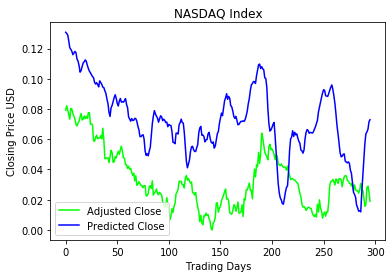

Train Score: 0.00137510 MSE (0.03708235 RMSE)
Test Score: 0.00196343 MSE (0.04431059 RMSE)


In [16]:
#model 1
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))


    model.add(Dense(
        units = 1))
    model.add(Activation('relu'))
    
    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))



In [ ]:
#model 1
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))


    model.add(Dense(
        units = 1))
    model.add(Activation('linear'))
    
    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


In [ ]:
#model 1
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))


    model.add(Dense(
        units = 1))
    model.add(Activation('softsign'))
    
    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

compilation time :  0.025005578994750977
Train on 2006 samples, validate on 106 samples
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


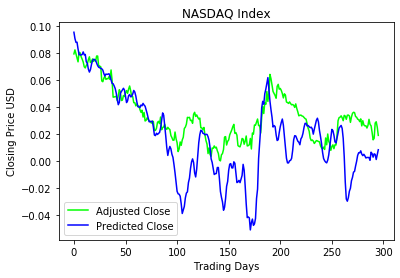

Train Score: 0.00055824 MSE (0.02362712 RMSE)
Test Score: 0.00064549 MSE (0.02540658 RMSE)


In [17]:
#model 1
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))


    model.add(Dense(
        units = 1))
    model.add(Activation('linear'))
    
    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='adamax')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
#model 1
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))


    model.add(Dense(
        units = 1))
    model.add(Activation('relu'))
    
    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='adamax')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
#model 1
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))


    model.add(Dense(
        units = 1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units = 1))
    model.add(Activation('relu'))
    
    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))